In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('creditcard.csv')

print("Null values:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


Null values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicate rows: 1081


<ipython-input-3-5c895e435592>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='coolwarm')


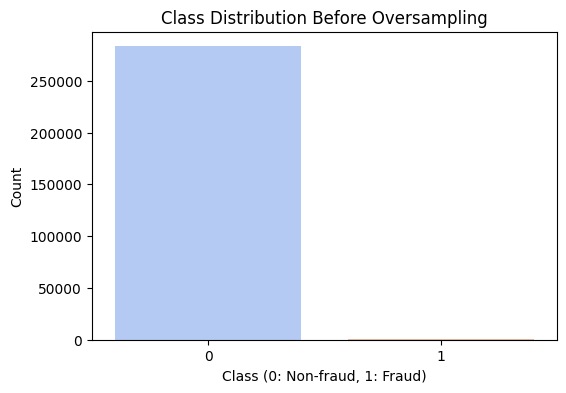

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='coolwarm')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class (0: Non-fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


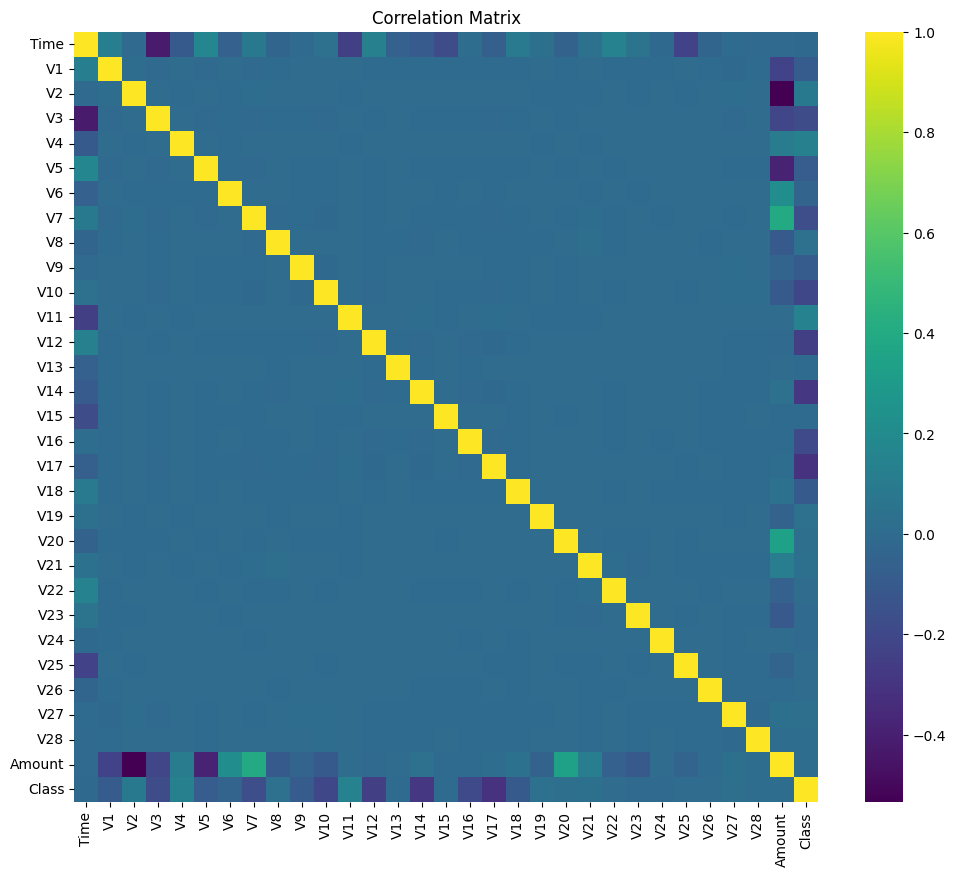

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


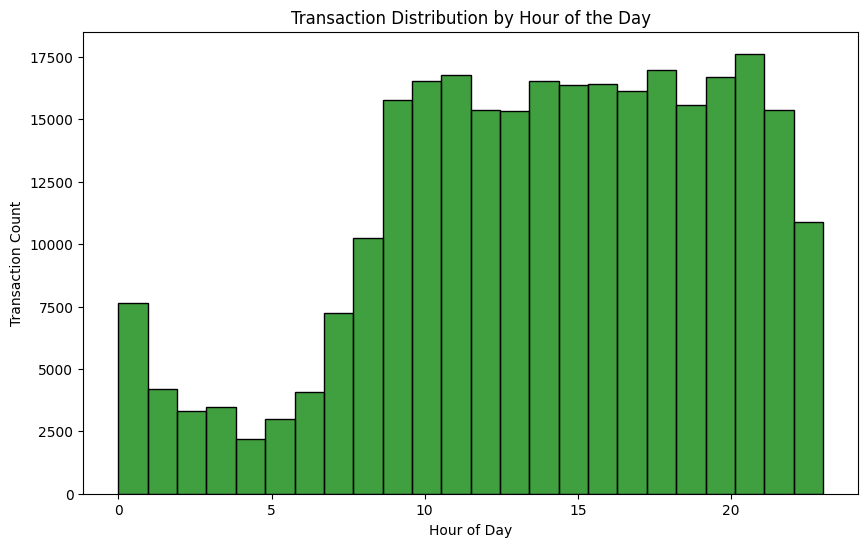

In [ ]:
df['Hour'] = df['Time'] // 3600 % 24
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='green')
plt.title('Transaction Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()

In [ ]:

df['Hour'] = df['Time'] // 3600 % 24
df['Day'] = df['Time'] // (3600 * 24)

X = df.drop(columns=['Class', 'Time'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42 )
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after oversampling:")
print(y_train_resampled.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after oversampling:
Class
0    226597
1    226597
Name: count, dtype: int64


In [ ]:
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=25,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=6,
    n_estimators=173,
    random_state=42
)

best_rf.fit(X_train_resampled, y_train_resampled)

y_pred = best_rf.predict(X_test_scaled)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.9995241955380115

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.79      0.84        90

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



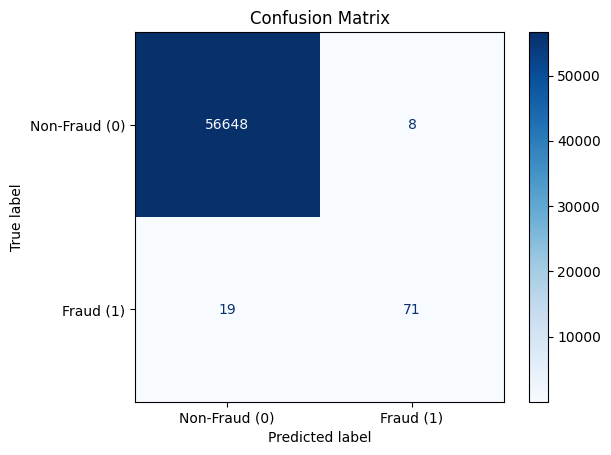

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-Fraud (0)", "Fraud (1)"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

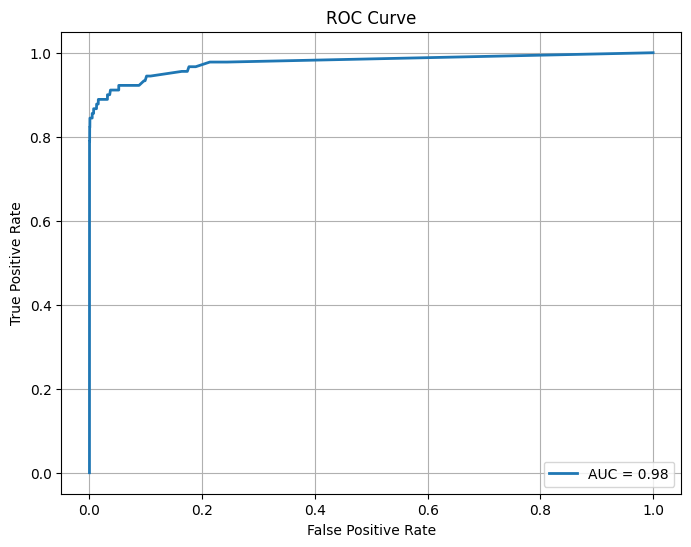

ROC AUC Score: 0.98


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", linewidth=2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"ROC AUC Score: {auc_score:.2f}")

In [ ]:
test_df_n = pd.read_csv('Classification_Test_file.csv')
test_df_n

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,72220,-2.204836,0.138638,-0.525362,-1.570647,-1.847153,-0.928306,0.037431,0.890464,-1.543718,...,-0.883499,-0.511137,-1.232655,0.398411,0.277140,-0.260672,-0.887380,-0.202659,-0.420885,148.44
1,72209,-0.470567,0.958589,1.658243,-0.093878,-0.170658,-0.702008,0.570126,0.101048,-0.579045,...,0.064239,-0.169439,-0.493480,-0.000591,0.499911,-0.271427,0.043086,0.257652,0.111620,3.58
2,48,-0.580629,0.482684,1.333123,-0.253080,-0.028469,-0.519166,0.503249,0.117773,0.117112,...,-0.298751,-0.042142,-0.148707,0.001451,0.302764,-0.680714,-0.015554,-0.006307,0.164222,21.66
3,85285,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
4,156685,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,0.399447,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,84204,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00
990,2029,-0.667367,-0.479007,2.026512,2.240121,-1.785324,1.371491,-1.663363,-2.306503,0.938575,...,1.207891,-1.155912,0.548137,-0.386310,0.444895,0.750750,-0.058660,0.136507,0.300104,288.45
991,1220,1.191381,0.276472,0.640380,0.639778,-0.366606,-0.685643,0.060510,-0.144514,-0.130831,...,-0.068666,-0.195895,-0.489926,0.192934,0.422102,0.133795,0.100540,-0.006028,0.021354,3.59
992,143438,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,8.90


In [ ]:
test_df_n['Hour'] = test_df_n['Time'] // 3600 % 24
test_df_n['Day'] = test_df_n['Time'] // (3600 * 24)
test_df_n = test_df_n.drop(columns=['Time'])
test_df_n_scaled = scaler.transform(test_df_n)

test_final = best_rf.predict(test_df_n_scaled)

tester = pd.DataFrame({
    'ID': range(0, len(test_final)),
    'Class': test_final,
})
tester.to_csv('tester.csv', index=False)
print("Predictions saved to 'tester.csv'")

Predictions saved to 'tester.csv'
